# **Video - Game -Sales- Analysis - using - Pytorch**

In [197]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
#importing dataset
dataset=pd.read_excel('/content/drive/MyDrive/vid_game_sale.xlsx')

In [199]:
#Looking at the dataset
dataset

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


In [200]:
#Checking for null values
dataset.isnull().sum()

,0
Rank,0
Game Title,0
Platform,0
Year,29
Genre,0
Publisher,2
North America,0
Europe,0
Japan,0
Rest of World,0


In [201]:
#Importing Imputers
from sklearn.impute import SimpleImputer

In [202]:
#Numerical and categorical imputers
num_imputer=SimpleImputer(strategy='mean')
cat_imputer=SimpleImputer(strategy='most_frequent')

In [203]:
dataset['Year']=num_imputer.fit_transform(dataset[['Year']])

In [204]:
dataset['Publisher']=cat_imputer.fit_transform(dataset['Publisher'].values.reshape(-1,1))[:,0]

In [205]:
dataset.isnull().sum()

,0
Rank,0
Game Title,0
Platform,0
Year,0
Genre,0
Publisher,0
North America,0
Europe,0
Japan,0
Rest of World,0


In [206]:
dataset['Year']=dataset['Year'].astype(int)

In [207]:
dataset['Year'].dtypes

dtype('int64')

# UNI-VARIATE ANALYSIS

In [208]:
dataset['Rank'].value_counts()

,count
Rank,
1,1
1268,1
1280,1
1279,1
1278,1
...,...
632,1
631,1
630,1


Text(0.5, 0.98, 'Hist of North America')

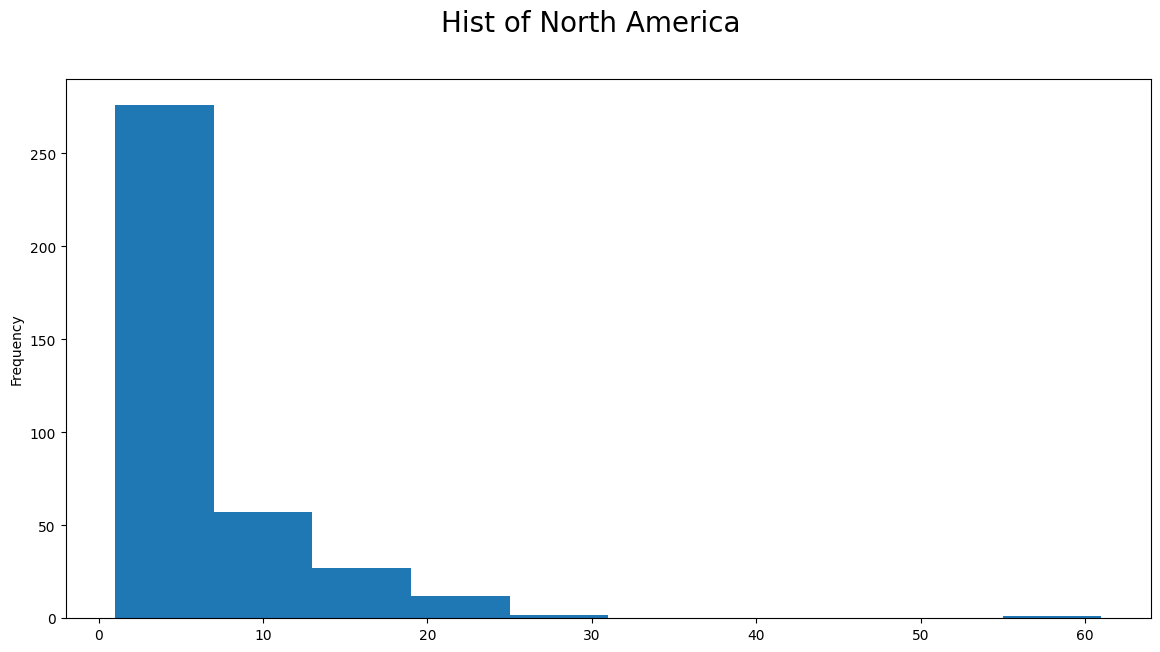

In [209]:
dataset['North America'].value_counts().plot(kind='hist',figsize=(14,7))
plt.suptitle('Hist of North America',fontsize=20)

Text(0.5, 0.98, 'Countplot of Europe')

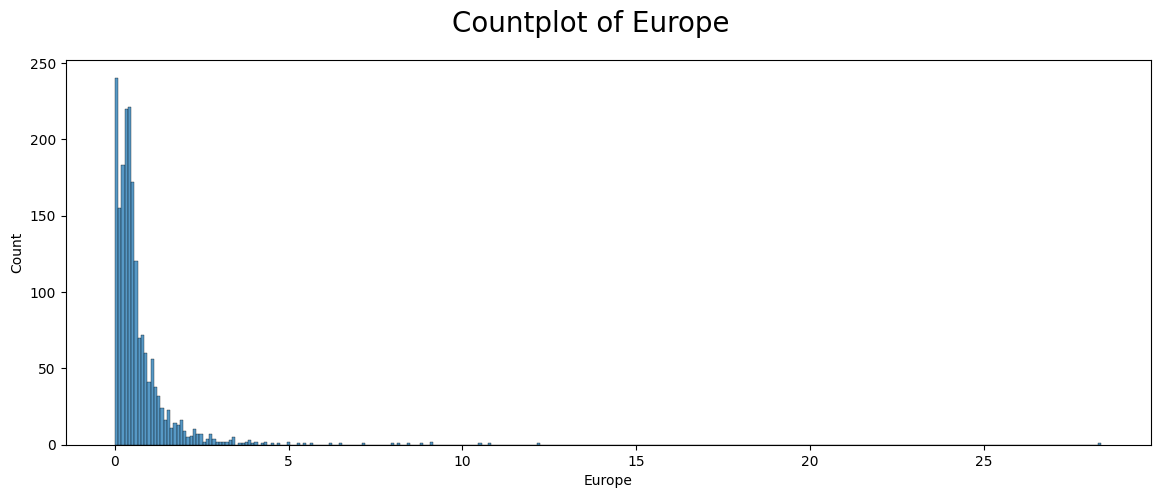

In [210]:
plt.figure(figsize=(14,5))
sns.histplot(dataset,x='Europe')
plt.suptitle('Countplot of Europe',fontsize=20)

Text(0.5, 0.98, 'Comapring the values of Japan in the dataset')

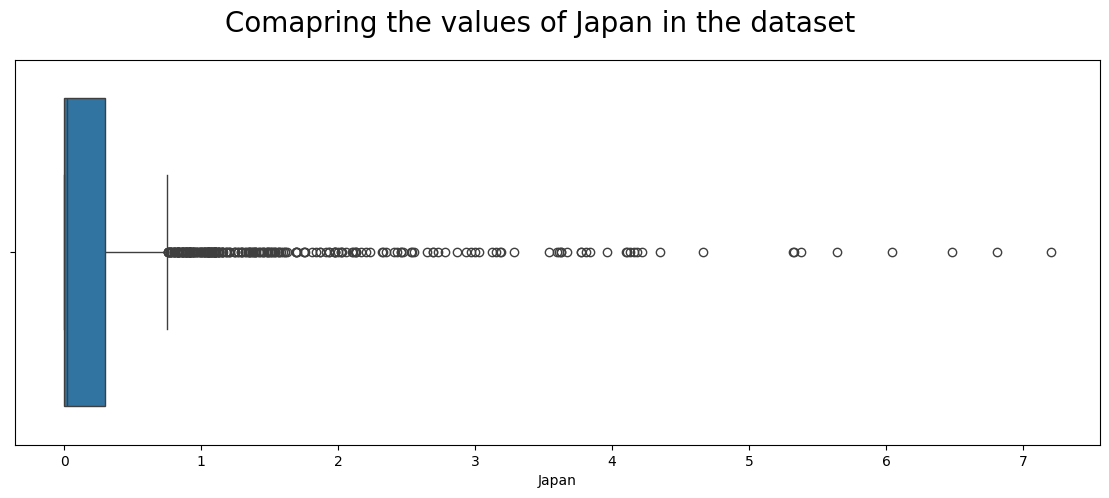

In [211]:
#Visualizing the japan dataset using boxplot
plt.figure(figsize=(14,5))
sns.boxplot(dataset,x='Japan')
plt.suptitle('Comapring the values of Japan in the dataset',fontsize=20)

Text(0.5, 0.98, 'Countplot of Global')

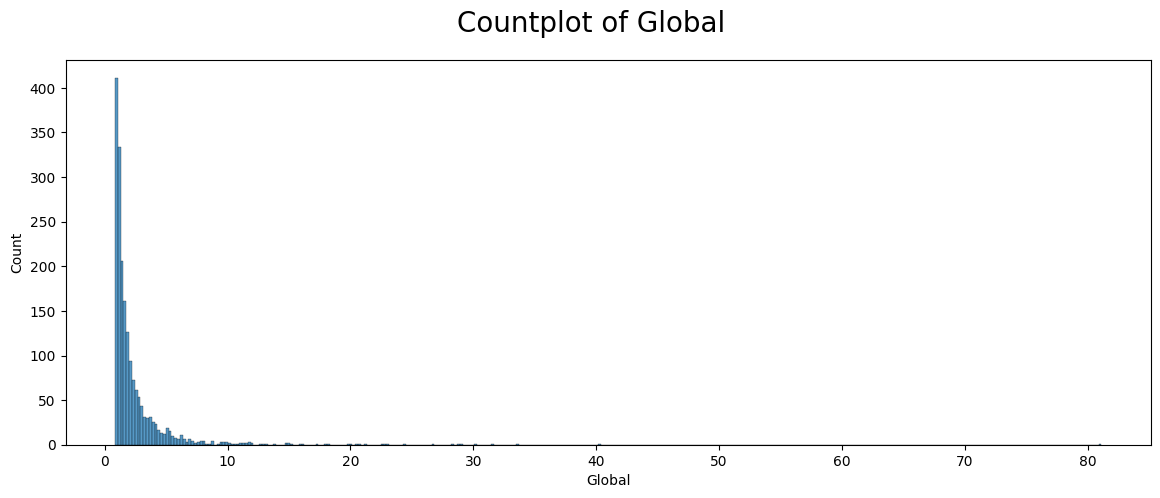

In [212]:
#Visualizing the Europe data in the dataset.
plt.figure(figsize=(14,5))
sns.histplot(dataset,x='Global')
plt.suptitle('Countplot of Global',fontsize=20)

Text(0.5, 0.98, 'Hist of Rest of World')

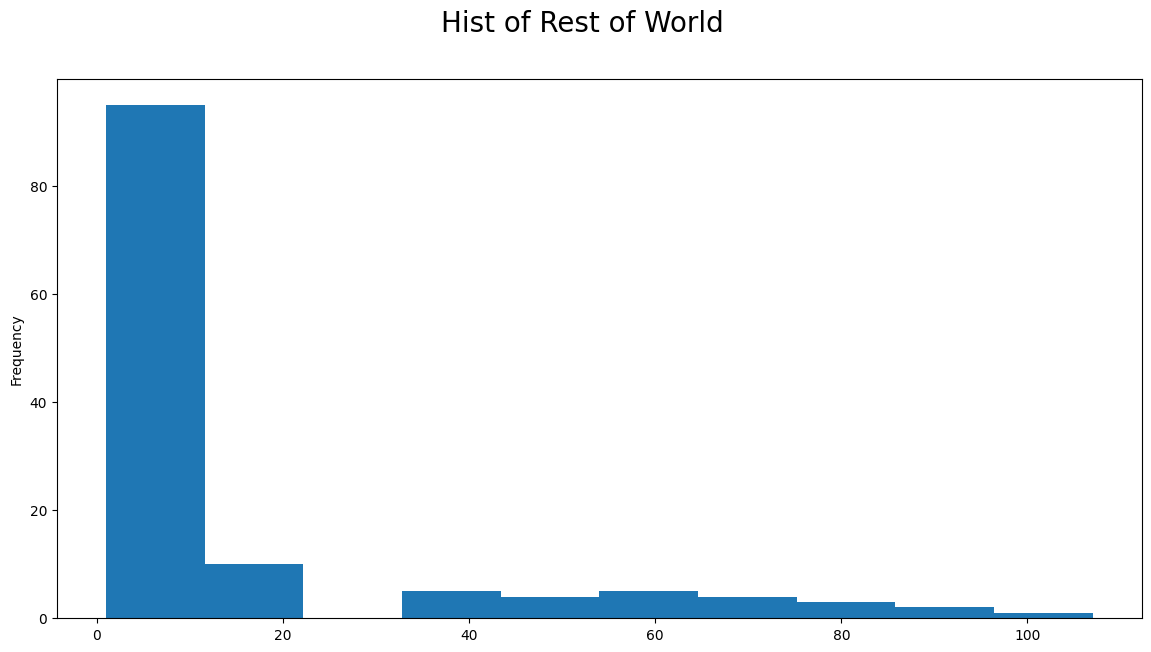

In [213]:
#Visualizing the North america values.
dataset['Rest of World'].value_counts().plot(kind='hist',figsize=(14,7))
plt.suptitle('Hist of Rest of World',fontsize=20)

# Bi-Variate Analysis

Text(0.5, 0.98, 'lineplot of Rank Vs Review')

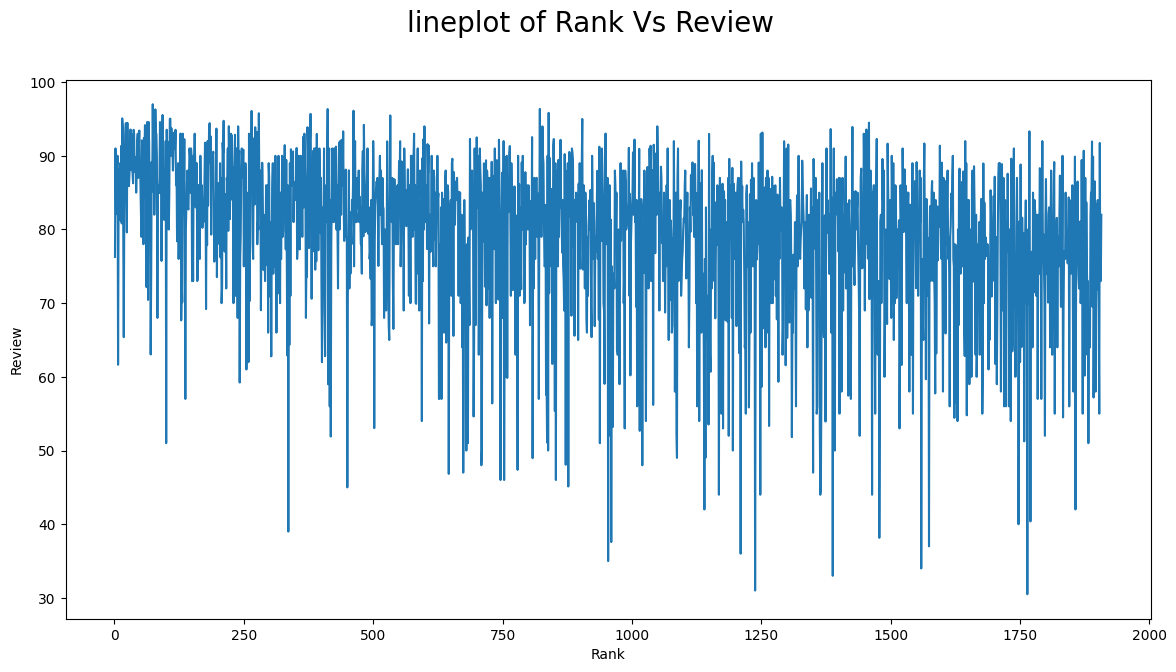

In [214]:
plt.figure(figsize=(14,7))
sns.lineplot(dataset,x='Rank',y='Review')
plt.suptitle('lineplot of Rank Vs Review',fontsize=20)

Text(0.5, 0.98, 'Areaplot of Rank Vs North America')

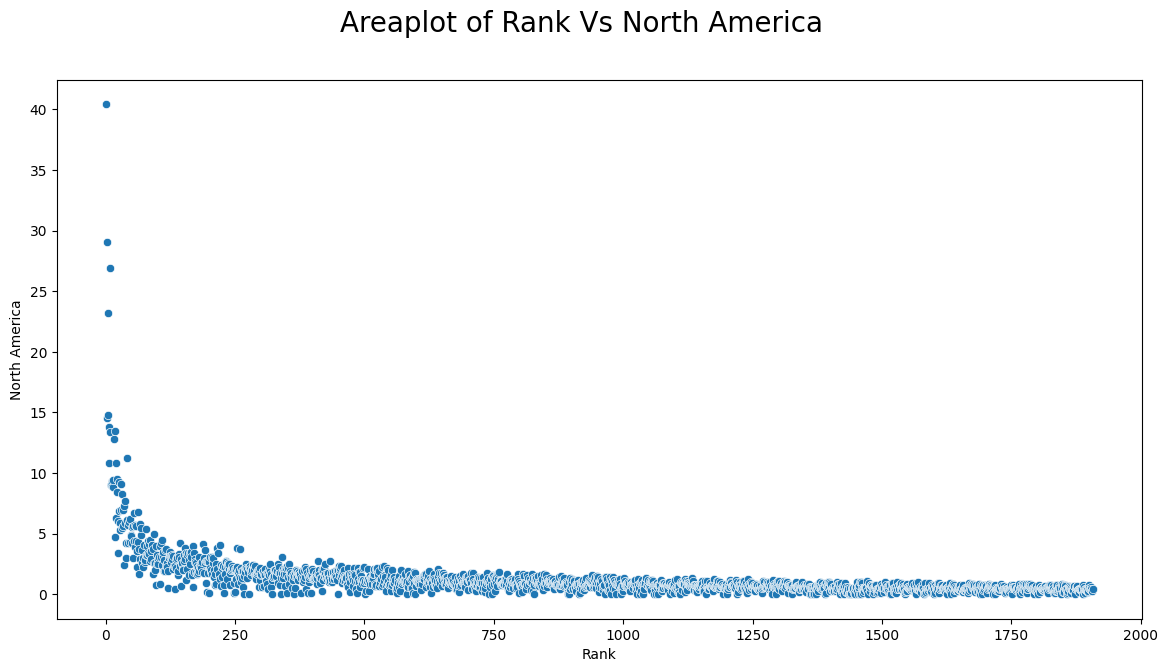

In [215]:
plt.figure(figsize=(14,7))
sns.scatterplot(dataset,x='Rank',y='North America')
plt.suptitle('Areaplot of Rank Vs North America',fontsize=20)

Text(0.5, 0.98, 'Scatterplot of Rank Vs Japan')

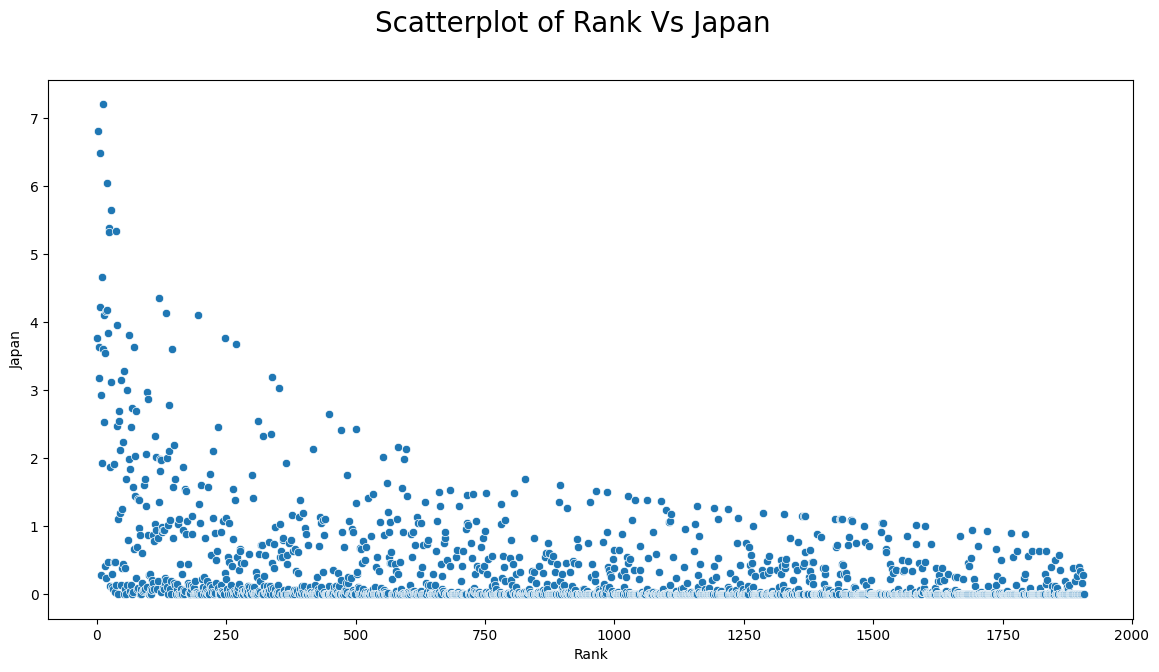

In [216]:
#comparing the dataset between the Rank Vs North America.
plt.figure(figsize=(14,7))
sns.scatterplot(dataset,x='Rank',y='Japan')
plt.suptitle('Scatterplot of Rank Vs Japan',fontsize=20)

Text(0.5, 0.98, 'Scatterplot of Rank Vs ROW')

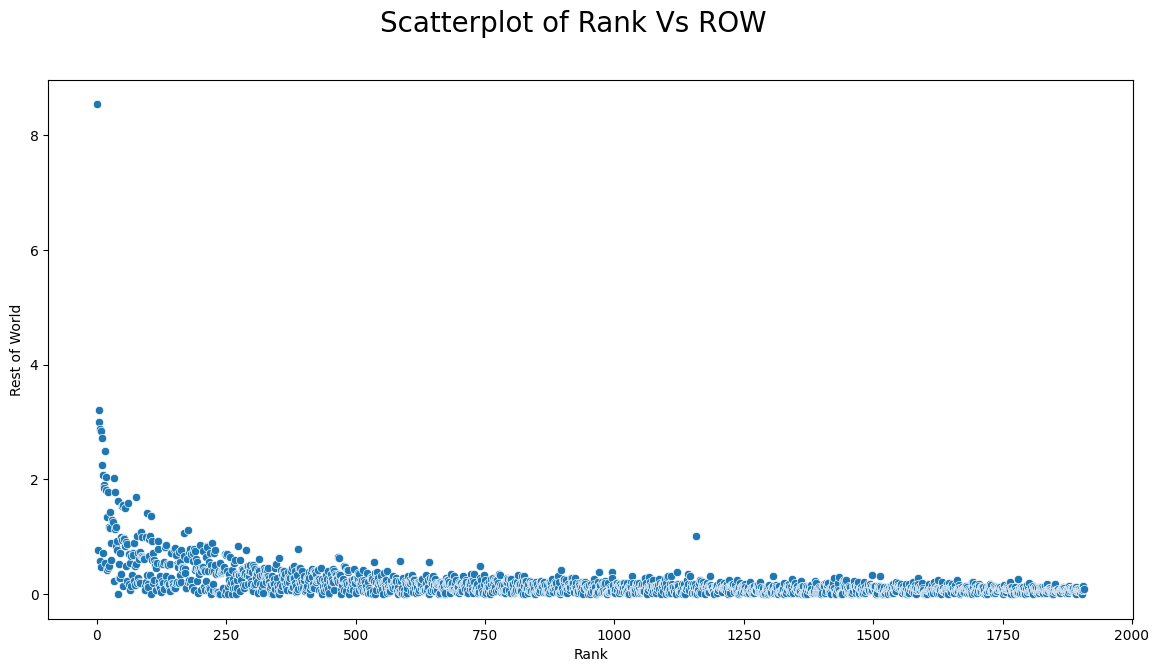

In [217]:
#comparing the dataset between the Rank Vs North America.
plt.figure(figsize=(14,7))
sns.scatterplot(dataset,x='Rank',y='Rest of World')
plt.suptitle('Scatterplot of Rank Vs ROW',fontsize=20)

# Correlation Analysis

In [218]:
num_data=['Rank','Year','North America','Europe','Japan','Rest of World','Global','Review']

Text(0.5, 0.98, 'Correlation of the dataset')

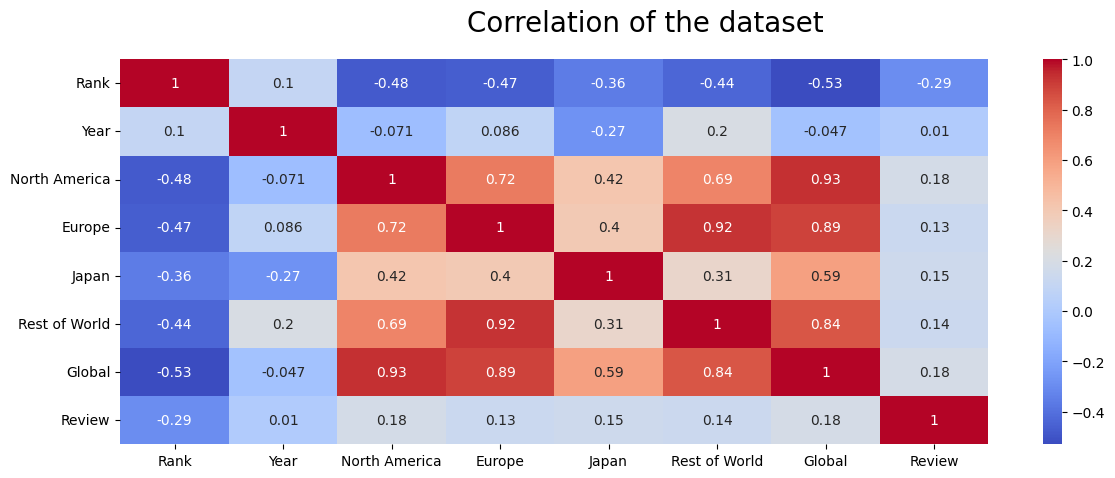

In [219]:
plt.figure(figsize=(14,5))
sns.heatmap(dataset[num_data].corr(),annot=True,cmap='coolwarm')
plt.suptitle('Correlation of the dataset',fontsize=20)

## Grouping and Aggregation

In [220]:
import plotly.express as px


In [221]:
# Group by Genre and sum up the Global sales
genre_sales = dataset.groupby('Genre')['Global'].sum().reset_index()
genre_sales


,Genre,Global
0,Action,637.27
1,Adventure,239.45
2,Fighting,249.00
3,Misc,426.12
4,Platform,595.24
5,Puzzle,108.65
6,Racing,451.80
7,Role-Playing,496.20
8,Shooter,557.20
9,Simulation,205.14


In [222]:
# Create a bar chart showing global sales by Genre
fig = px.bar(genre_sales, x='Genre', y='Global', title='Global Sales by Genre')
fig.show()

In [223]:
# Group by Platform and calculate the average Review score
platform_reviews = dataset.groupby('Platform')['Review'].mean().reset_index()
platform_reviews


,Platform,Review
0,3DS,81.246000
1,DC,91.545000
2,DS,73.234430
3,GB,78.637917
4,GBA,75.041200
5,GC,80.737818
6,GEN,86.090909
7,N64,81.261404
8,NES,76.245000
9,PC,84.619437


In [224]:
# Create a bar chart showing average review scores by Platform
fig = px.bar(platform_reviews, x='Platform', y='Review', title='Average Review Score by Platform')
fig.show()

In [225]:
# Group by Genre and sum Global sales
genre_sales = dataset.groupby('Genre')['Global'].sum().reset_index()
genre_sales = genre_sales.sort_values(by='Global', ascending=False)
genre_sales

,Genre,Global
10,Sports,703.11
0,Action,637.27
4,Platform,595.24
8,Shooter,557.20
7,Role-Playing,496.20
6,Racing,451.80
3,Misc,426.12
2,Fighting,249.00
1,Adventure,239.45
9,Simulation,205.14


Text(0, 0.5, 'Genre')

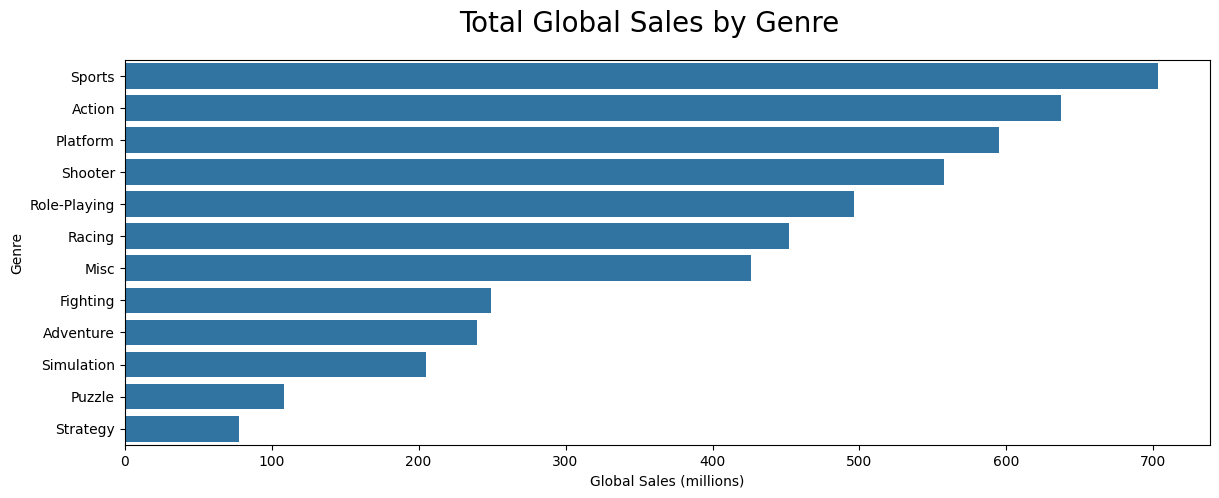

In [226]:
plt.figure(figsize=(14, 5))
sns.barplot(x='Global', y='Genre', data=genre_sales)
plt.suptitle('Total Global Sales by Genre',fontsize=20)
plt.xlabel('Global Sales (millions)')
plt.ylabel('Genre')

In [227]:
platform_year_sales = dataset.groupby(['Platform', 'Year'])['Global'].sum().unstack()
platform_year_sales

Year,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Platform,,,,,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.69,11.06
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.21,110.93,86.27,81.98,64.07,50.73,35.29,5.93,6.38
GB,NaN,NaN,NaN,NaN,NaN,1.43,60.10,4.56,2.90,25.25,...,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.39,36.26,7.13,NaN,1.21,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.91,13.77,11.06,3.48,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,4.34,12.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NES,10.96,45.66,49.57,27.17,17.06,40.76,2.77,13.16,2.98,1.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


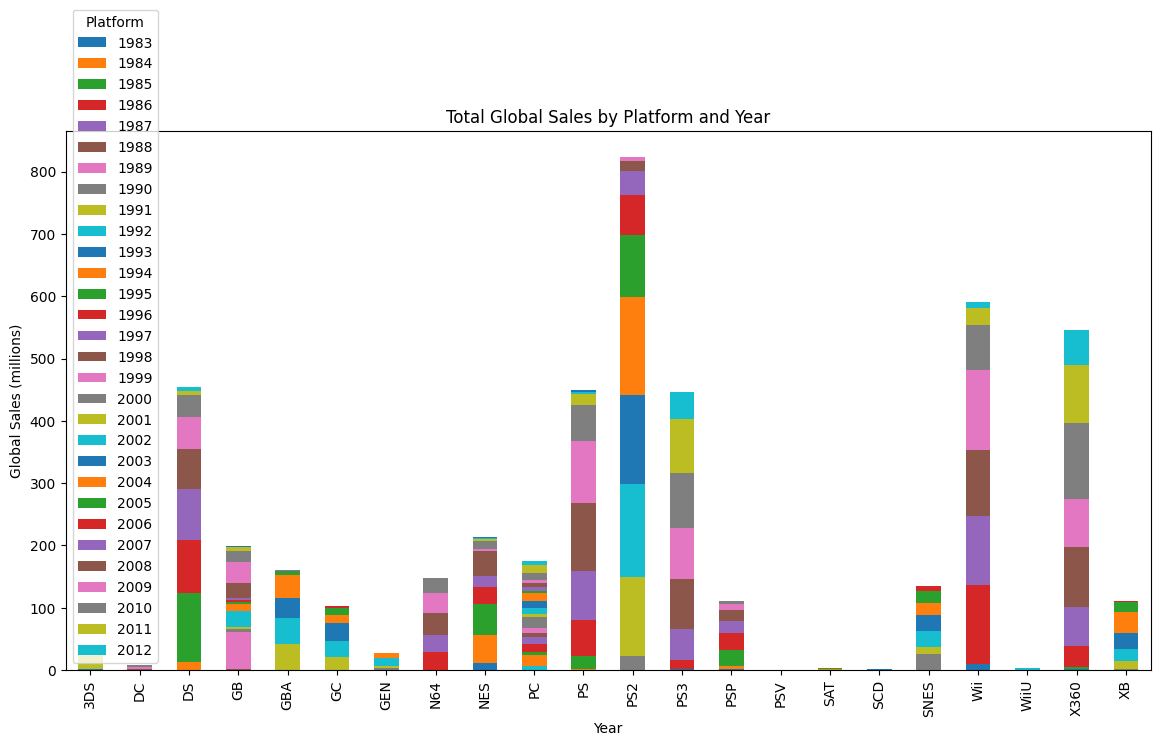

In [228]:
platform_year_sales.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Total Global Sales by Platform and Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.legend(title='Platform')

In [229]:
# Group by Genre and Platform, summing Global sales
genre_platform_sales = dataset.groupby(['Genre', 'Platform'])['Global'].sum().unstack(fill_value=0)
genre_platform_sales

Platform,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,PC,...,PS3,PSP,PSV,SAT,SCD,SNES,Wii,WiiU,X360,XB
Genre,,,,,,,,,,,,,,,,,,,,,
Action,4.38,1.14,19.25,1.73,13.06,14.14,2.60,7.89,9.14,2.92,...,122.67,23.14,0.93,0.00,0.0,2.58,26.21,3.36,95.13,22.10
Adventure,4.06,1.18,41.75,11.59,13.58,8.06,0.00,10.96,13.62,14.70,...,19.93,4.15,0.00,0.00,0.0,6.03,23.27,0.00,20.40,2.05
Fighting,0.90,0.00,0.00,0.00,1.08,9.61,5.67,15.81,6.47,0.00,...,27.62,5.90,0.00,3.00,0.0,19.06,14.52,0.00,20.53,3.73
Misc,0.00,0.00,89.63,8.50,8.94,10.97,0.00,8.56,2.14,8.87,...,13.83,2.40,0.00,0.00,0.0,2.75,137.43,0.00,49.74,3.03
Platform,13.87,2.42,62.32,64.73,49.61,16.98,15.36,30.62,87.99,0.00,...,16.10,10.89,0.00,0.00,1.5,61.80,75.76,0.00,6.69,2.13
Puzzle,0.00,0.00,18.15,44.77,7.05,2.98,0.00,1.04,16.13,0.00,...,0.00,1.10,0.00,0.00,0.0,1.70,6.92,0.00,0.00,0.00
Racing,7.71,1.81,24.57,4.55,8.63,12.83,0.00,25.49,7.64,0.00,...,42.87,18.93,0.00,1.16,0.0,12.51,38.65,0.00,38.24,13.58
Role-Playing,2.32,0.00,103.01,48.56,51.98,8.63,0.00,1.38,15.30,38.04,...,29.00,17.17,0.00,0.00,0.0,18.26,4.44,0.00,46.21,9.98
Shooter,0.00,0.00,1.00,1.20,0.00,5.23,0.00,14.42,30.85,21.72,...,115.75,10.61,0.00,0.00,0.0,4.64,19.33,0.00,198.56,35.44


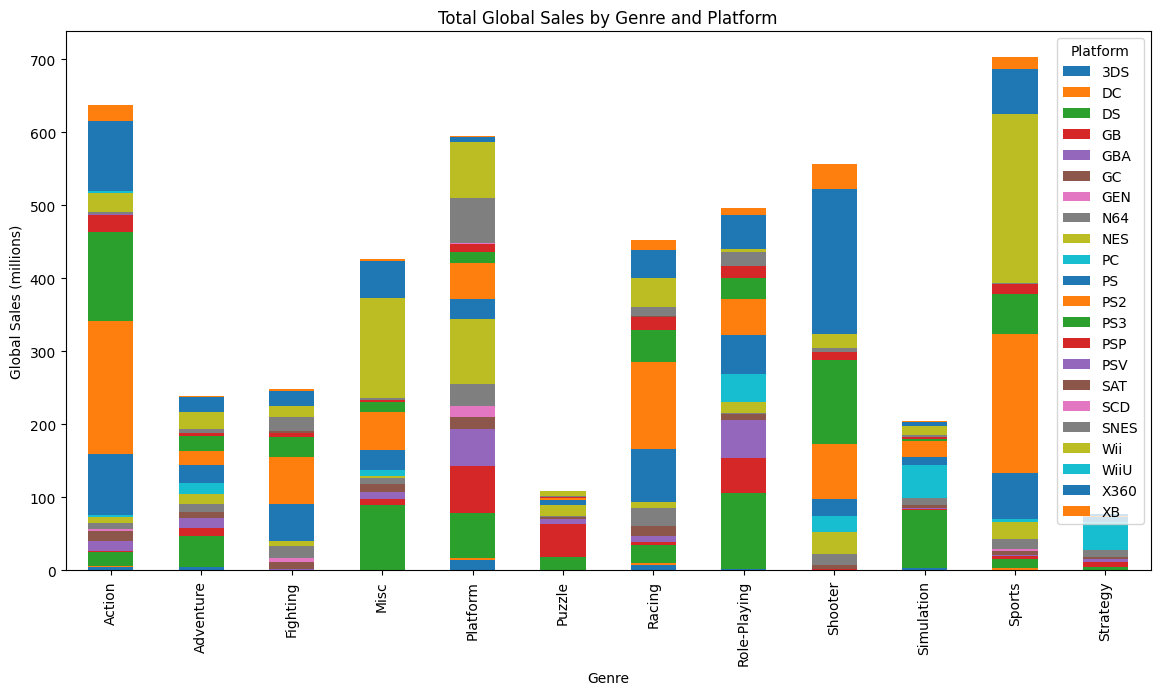

In [230]:
genre_platform_sales.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Total Global Sales by Genre and Platform')
plt.xlabel('Genre')
plt.ylabel('Global Sales (millions)')
plt.legend(title='Platform')

In [231]:
# Group by Year and sum sales across regions
yearly_region_sales = dataset.groupby('Year')[['North America', 'Europe', 'Japan', 'Rest of World']].sum().reset_index()
yearly_region_sales

,Year,North America,Europe,Japan,Rest of World
0,1983,2.32,0.46,8.10,0.08
1,1984,32.15,1.85,11.00,0.65
2,1985,32.09,4.45,12.13,0.90
3,1986,10.59,2.60,13.58,0.40
4,1987,5.28,1.18,10.42,0.18
5,1988,21.49,6.26,13.55,0.90
6,1989,39.31,7.33,14.85,1.37
7,1990,23.59,7.44,14.04,1.39
8,1991,10.87,3.67,6.25,0.62
9,1992,36.22,12.76,20.65,1.84


In [232]:
# Create a line plot for regional sales by year
fig = px.line(yearly_region_sales, x='Year', y=yearly_region_sales.columns[1:],
              title='Regional Sales by Year')
fig.show()

In [233]:
# Aggregate sales by region
region_sales = dataset[['North America', 'Europe', 'Japan', 'Rest of World']].sum().reset_index()

# Rename columns for readability
region_sales.columns = ['Region', 'Sales']

# For visualization, we will map regions to countries (ISO 3166-1 alpha-3 codes)
region_codes = {
    'North America': 'USA',  # Example: You could aggregate USA, Canada, Mexico into this category
    'Europe': 'EUU',  # Placeholder for Europe; you can split or map specific countries if needed
    'Japan': 'JPN',   # Japan code
    'Rest of World': 'ROW'  # You could specify additional regions or leave this as "Rest of World"
}

# Map the region names to their respective country codes
region_sales['Country_Code'] = region_sales['Region'].map(region_codes)

# Create the choropleth map
fig = px.choropleth(region_sales,
                    locations='Country_Code',
                    color='Sales',
                    hover_name='Region',
                    color_continuous_scale='Viridis',
                    title="Regional Sales in Video Games")

# Show the map
fig.show()

# Deep learning Analysis Using Pytorch

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [235]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [236]:
features = ['Rank', 'Year', 'North America', 'Europe', 'Japan', 'Rest of World', 'Review']
target = 'Global'

In [237]:
X = dataset[features]
y = dataset[target]

# Data scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [238]:
# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.values.reshape(-1, 1), dtype=torch.float32)

In [239]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [240]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Use the last hidden state
        return out

In [241]:
# Hyperparameters
input_size = len(features)
hidden_size = 64
num_layers = 2
output_size = 1
learning_rate = 0.001
num_epochs = 100

In [242]:
# Model instantiation and training (Example with LSTM)
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [243]:
# Reshape data for LSTM/GRU (add a sequence length dimension of 1)
X_train = X_train.unsqueeze(1)
X_test = X_test.unsqueeze(1)

for epoch in range(num_epochs):
  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  # Backward and optimize
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1) % 10 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation (example)
with torch.no_grad():
  predicted = model(X_test)
  test_loss = criterion(predicted, y_test)
  print(f'Test Loss of LSTM: {test_loss.item():.4f}')

Epoch [10/100], Loss: 20.4436
Epoch [20/100], Loss: 19.8950
Epoch [30/100], Loss: 18.9972
Epoch [40/100], Loss: 17.5223
Epoch [50/100], Loss: 15.4259
Epoch [60/100], Loss: 13.0358
Epoch [70/100], Loss: 10.9249
Epoch [80/100], Loss: 9.5192
Epoch [90/100], Loss: 8.7972
Epoch [100/100], Loss: 8.4040
Test Loss of LSTM: 0.8110


In [244]:
# GRU Model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out

In [245]:
# Hyperparameters
input_size = len(features)
hidden_size = 64
num_layers = 2
output_size = 1
learning_rate = 0.001
num_epochs = 100

In [246]:
# Model instantiation and training (Example with LSTM)
model = GRUModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [247]:
# Reshape data for LSTM/GRU (add a sequence length dimension of 1)
X_train = X_train.view(X_train.shape[0], 1, -1)
X_test = X_test.view(X_test.shape[0], 1, -1)

for epoch in range(num_epochs):
  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  # Backward and optimize
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1) % 10 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation (example)
with torch.no_grad():
  predicted = model(X_test)
  test_loss = criterion(predicted, y_test)
  print(f'Test Loss of GRU: {test_loss.item():.4f}')

Epoch [10/100], Loss: 20.7245
Epoch [20/100], Loss: 19.4060
Epoch [30/100], Loss: 17.3175
Epoch [40/100], Loss: 14.5597
Epoch [50/100], Loss: 11.8329
Epoch [60/100], Loss: 9.8435
Epoch [70/100], Loss: 8.6760
Epoch [80/100], Loss: 8.0370
Epoch [90/100], Loss: 7.6301
Epoch [100/100], Loss: 7.2687
Test Loss of GRU: 0.4467


In [248]:
class LSTM_GRU(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers,output_size):
    super(LSTM_GRU,self).__init__()
    self.lstm=nn.LSTM(input_size,hidden_size,num_layers,batch_first=True)
    self.gru=nn.GRU(input_size,hidden_size,num_layers,batch_first=True)
    self.fc=nn.Linear(hidden_size,output_size)

  def forward(self,x):
    lstm_out,_=self.lstm(x)
    gru_out,_=self.gru(x)
    out=self.fc(gru_out[:,-1,:])
    return out

In [249]:
# Hyperparameters (adjust as needed)
input_size = len(features)
hidden_size = 64  # Example hidden size
num_layers = 2
output_size = 1
learning_rate = 0.001
num_epochs = 100

In [250]:
# Model instantiation
model = LSTM_GRU(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [251]:
# Reshape data for LSTM/GRU (add a sequence length dimension of 1)
# Check if the data is already 3D, if not, reshape it
if X_train.dim() == 2:  # If X_train is 2D (samples x features)
    X_train = X_train.unsqueeze(1)  # Reshape to 3D (samples x sequence_length x features)
if X_test.dim() == 2:
    X_test = X_test.unsqueeze(1)

In [252]:
# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
with torch.no_grad():
    predicted = model(X_test)
    test_loss = criterion(predicted, y_test)
    print(f'Test Loss LSTM_GRU: {test_loss.item():.4f}')

Epoch [10/100], Loss: 20.1691
Epoch [20/100], Loss: 18.7888
Epoch [30/100], Loss: 16.6821
Epoch [40/100], Loss: 14.0772
Epoch [50/100], Loss: 11.6251
Epoch [60/100], Loss: 9.8510
Epoch [70/100], Loss: 8.7881
Epoch [80/100], Loss: 8.1905
Epoch [90/100], Loss: 7.7882
Epoch [100/100], Loss: 7.4208
Test Loss LSTM_GRU: 0.4357


In [253]:
 #Dual Layer GRU model
class DualLayerGRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(DualLayerGRUModel, self).__init__()
        self.gru1 = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.gru2 = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True)  # Input is GRU1 output
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru1(x)
        out, _ = self.gru2(out)  # Pass GRU1 output to GRU2
        out = self.fc(out[:, -1, :])  # Use the last hidden state for prediction
        return out

In [254]:
# Hyperparameters (adjust as needed)
input_size = len(features)
hidden_size = 64  # Example hidden size
num_layers = 2
output_size = 1
learning_rate = 0.001
num_epochs = 100

In [255]:
# Model instantiation
model = DualLayerGRUModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [256]:
# Reshape data for GRU (add a sequence length dimension of 1)
# Check if the data is already 3D, if not, reshape it
if X_train.dim() == 2:  # If X_train is 2D (samples x features)
    X_train = X_train.unsqueeze(1)  # Reshape to 3D (samples x sequence_length x features)
if X_test.dim() == 2:
    X_test = X_test.unsqueeze(1)

In [257]:
# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
with torch.no_grad():
    predicted = model(X_test)
    test_loss = criterion(predicted, y_test)
    print(f'Test Loss DualLayerGRU: {test_loss.item():.4f}')

Epoch [10/100], Loss: 19.8858
Epoch [20/100], Loss: 18.2080
Epoch [30/100], Loss: 14.1310
Epoch [40/100], Loss: 10.7851
Epoch [50/100], Loss: 10.1224
Epoch [60/100], Loss: 9.0987
Epoch [70/100], Loss: 8.4304
Epoch [80/100], Loss: 7.7896
Epoch [90/100], Loss: 7.2706
Epoch [100/100], Loss: 6.8417
Test Loss DualLayerGRU: 0.1775


In [258]:
class DualLayerLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        # Change 'DualLayerGRUModel' to 'DualLayerLSTMModel'
        super(DualLayerLSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)  # Input is GRU1 output
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out, _ = self.lstm2(out)  # Pass GRU1 output to GRU2
        out = self.fc(out[:, -1, :])  # Use the last hidden state for prediction
        return out

In [259]:
# Hyperparameters (adjust as needed)
input_size = len(features)
hidden_size = 64  # Example hidden size
num_layers = 2
output_size = 1
learning_rate = 0.001
num_epochs = 100

In [260]:
# Model instantiation
model = DualLayerLSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [261]:
# Reshape data for GRU (add a sequence length dimension of 1)
# Check if the data is already 3D, if not, reshape it
if X_train.dim() == 2:  # If X_train is 2D (samples x features)
    X_train = X_train.unsqueeze(1)  # Reshape to 3D (samples x sequence_length x features)
if X_test.dim() == 2:
    X_test = X_test.unsqueeze(1)

In [262]:
# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
with torch.no_grad():
    predicted = model(X_test)
    test_loss = criterion(predicted, y_test)
    print(f'Test Loss of DualLayerLSTM: {test_loss.item():.4f}')

Epoch [10/100], Loss: 20.7561
Epoch [20/100], Loss: 20.3250
Epoch [30/100], Loss: 19.4217
Epoch [40/100], Loss: 16.9767
Epoch [50/100], Loss: 13.0171
Epoch [60/100], Loss: 11.1828
Epoch [70/100], Loss: 10.4575
Epoch [80/100], Loss: 9.6277
Epoch [90/100], Loss: 9.0776
Epoch [100/100], Loss: 8.5619
Test Loss of DualLayerLSTM: 0.6077
